In [61]:
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from sklearn import svm,cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
style.use('ggplot')

In [3]:
start=dt.datetime(2000,1,1)
end=dt.datetime(2016,12,31)

In [4]:
# pull off tesla data from yahoo finance and store into a dataframe
df= web.DataReader('TSLA', 'yahoo', start, end) 

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

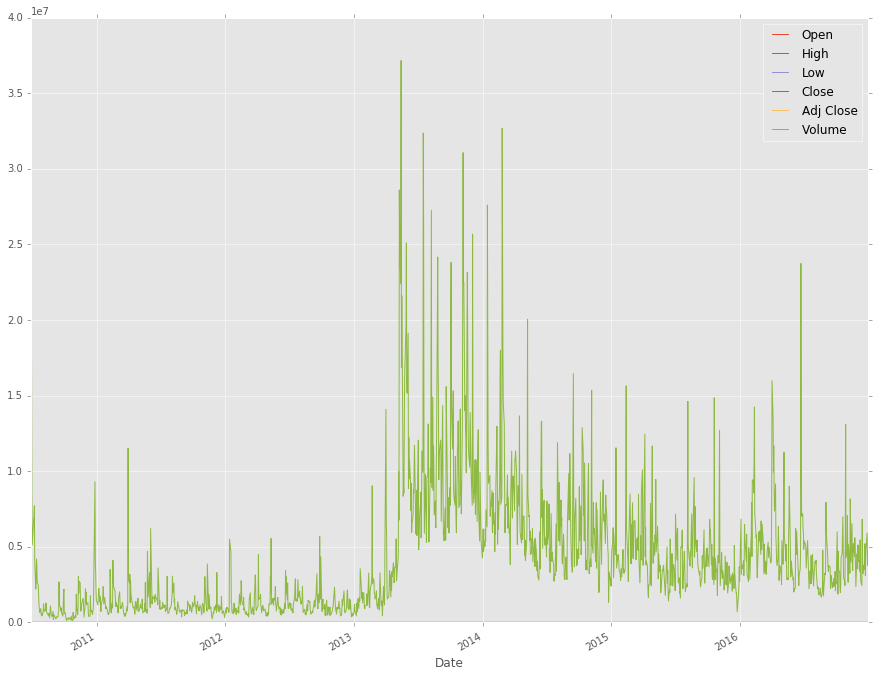

In [7]:
df.plot()
plt.show()

In [8]:
fig_size[0] = 20
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size

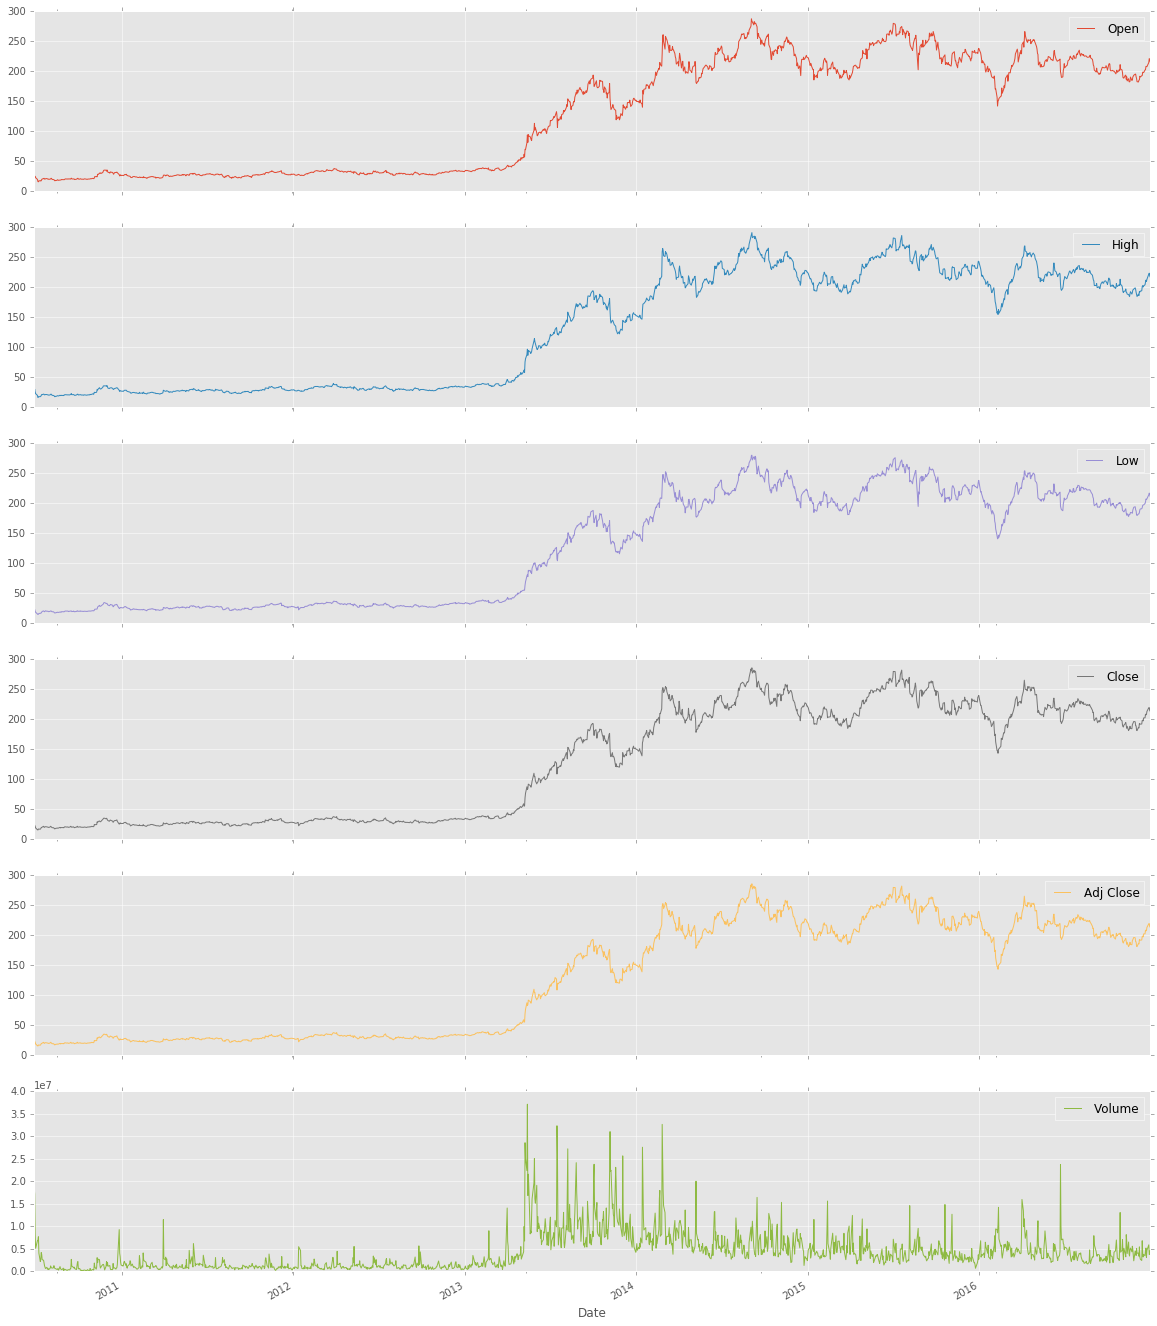

In [9]:
df.plot(subplots=True)
plt.show()

In [10]:
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [11]:
dfwithmovingaverage=df

In [12]:
dfwithmovingaverage['100ma']= df['Adj Close'].rolling(window=100,min_periods=0).mean()
dfwithmovingaverage.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,20.998000


In [13]:
dfwithmovingaverage.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900,202.6190
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700,202.5082
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500,202.4053
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900,202.2905
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600,202.1366


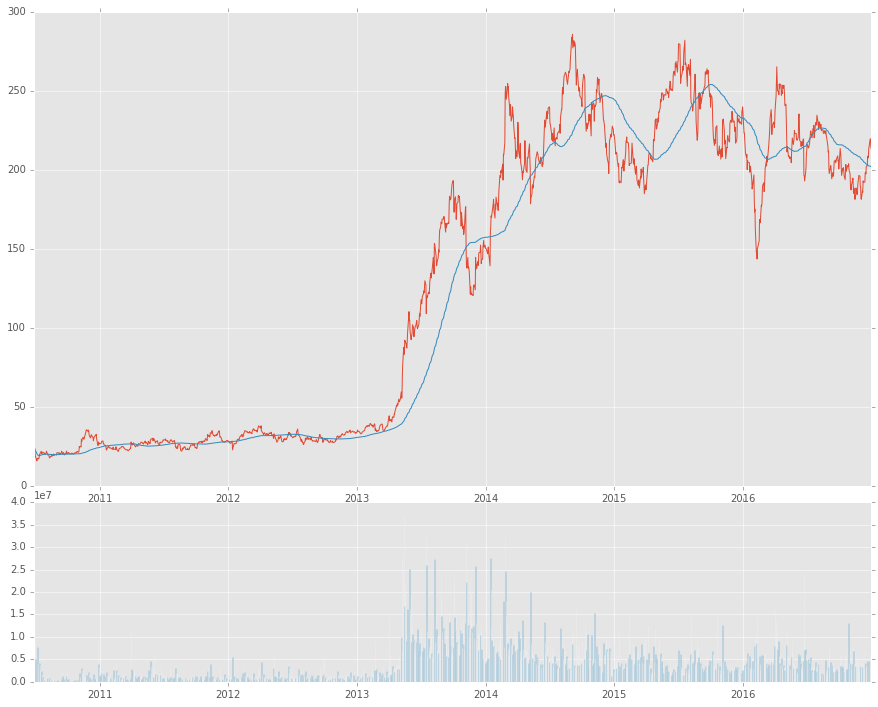

In [14]:
ax1=plt.subplot2grid((7,1),(0,0),rowspan=5, colspan=1)
ax2=plt.subplot2grid((7,1),(5,0),rowspan=2, colspan=1)

ax1.plot(dfwithmovingaverage.index,df['Adj Close'])
ax1.plot(dfwithmovingaverage.index,df['100ma'])
ax2.bar(dfwithmovingaverage.index,df['Volume'])
plt.show()

In [15]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [16]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()

In [17]:
df_ohlc.reset_index(inplace=True)

In [18]:
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [19]:
df_ohlc['Date']= df_ohlc['Date'].map(mdates.date2num)

In [20]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


In [21]:
fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size

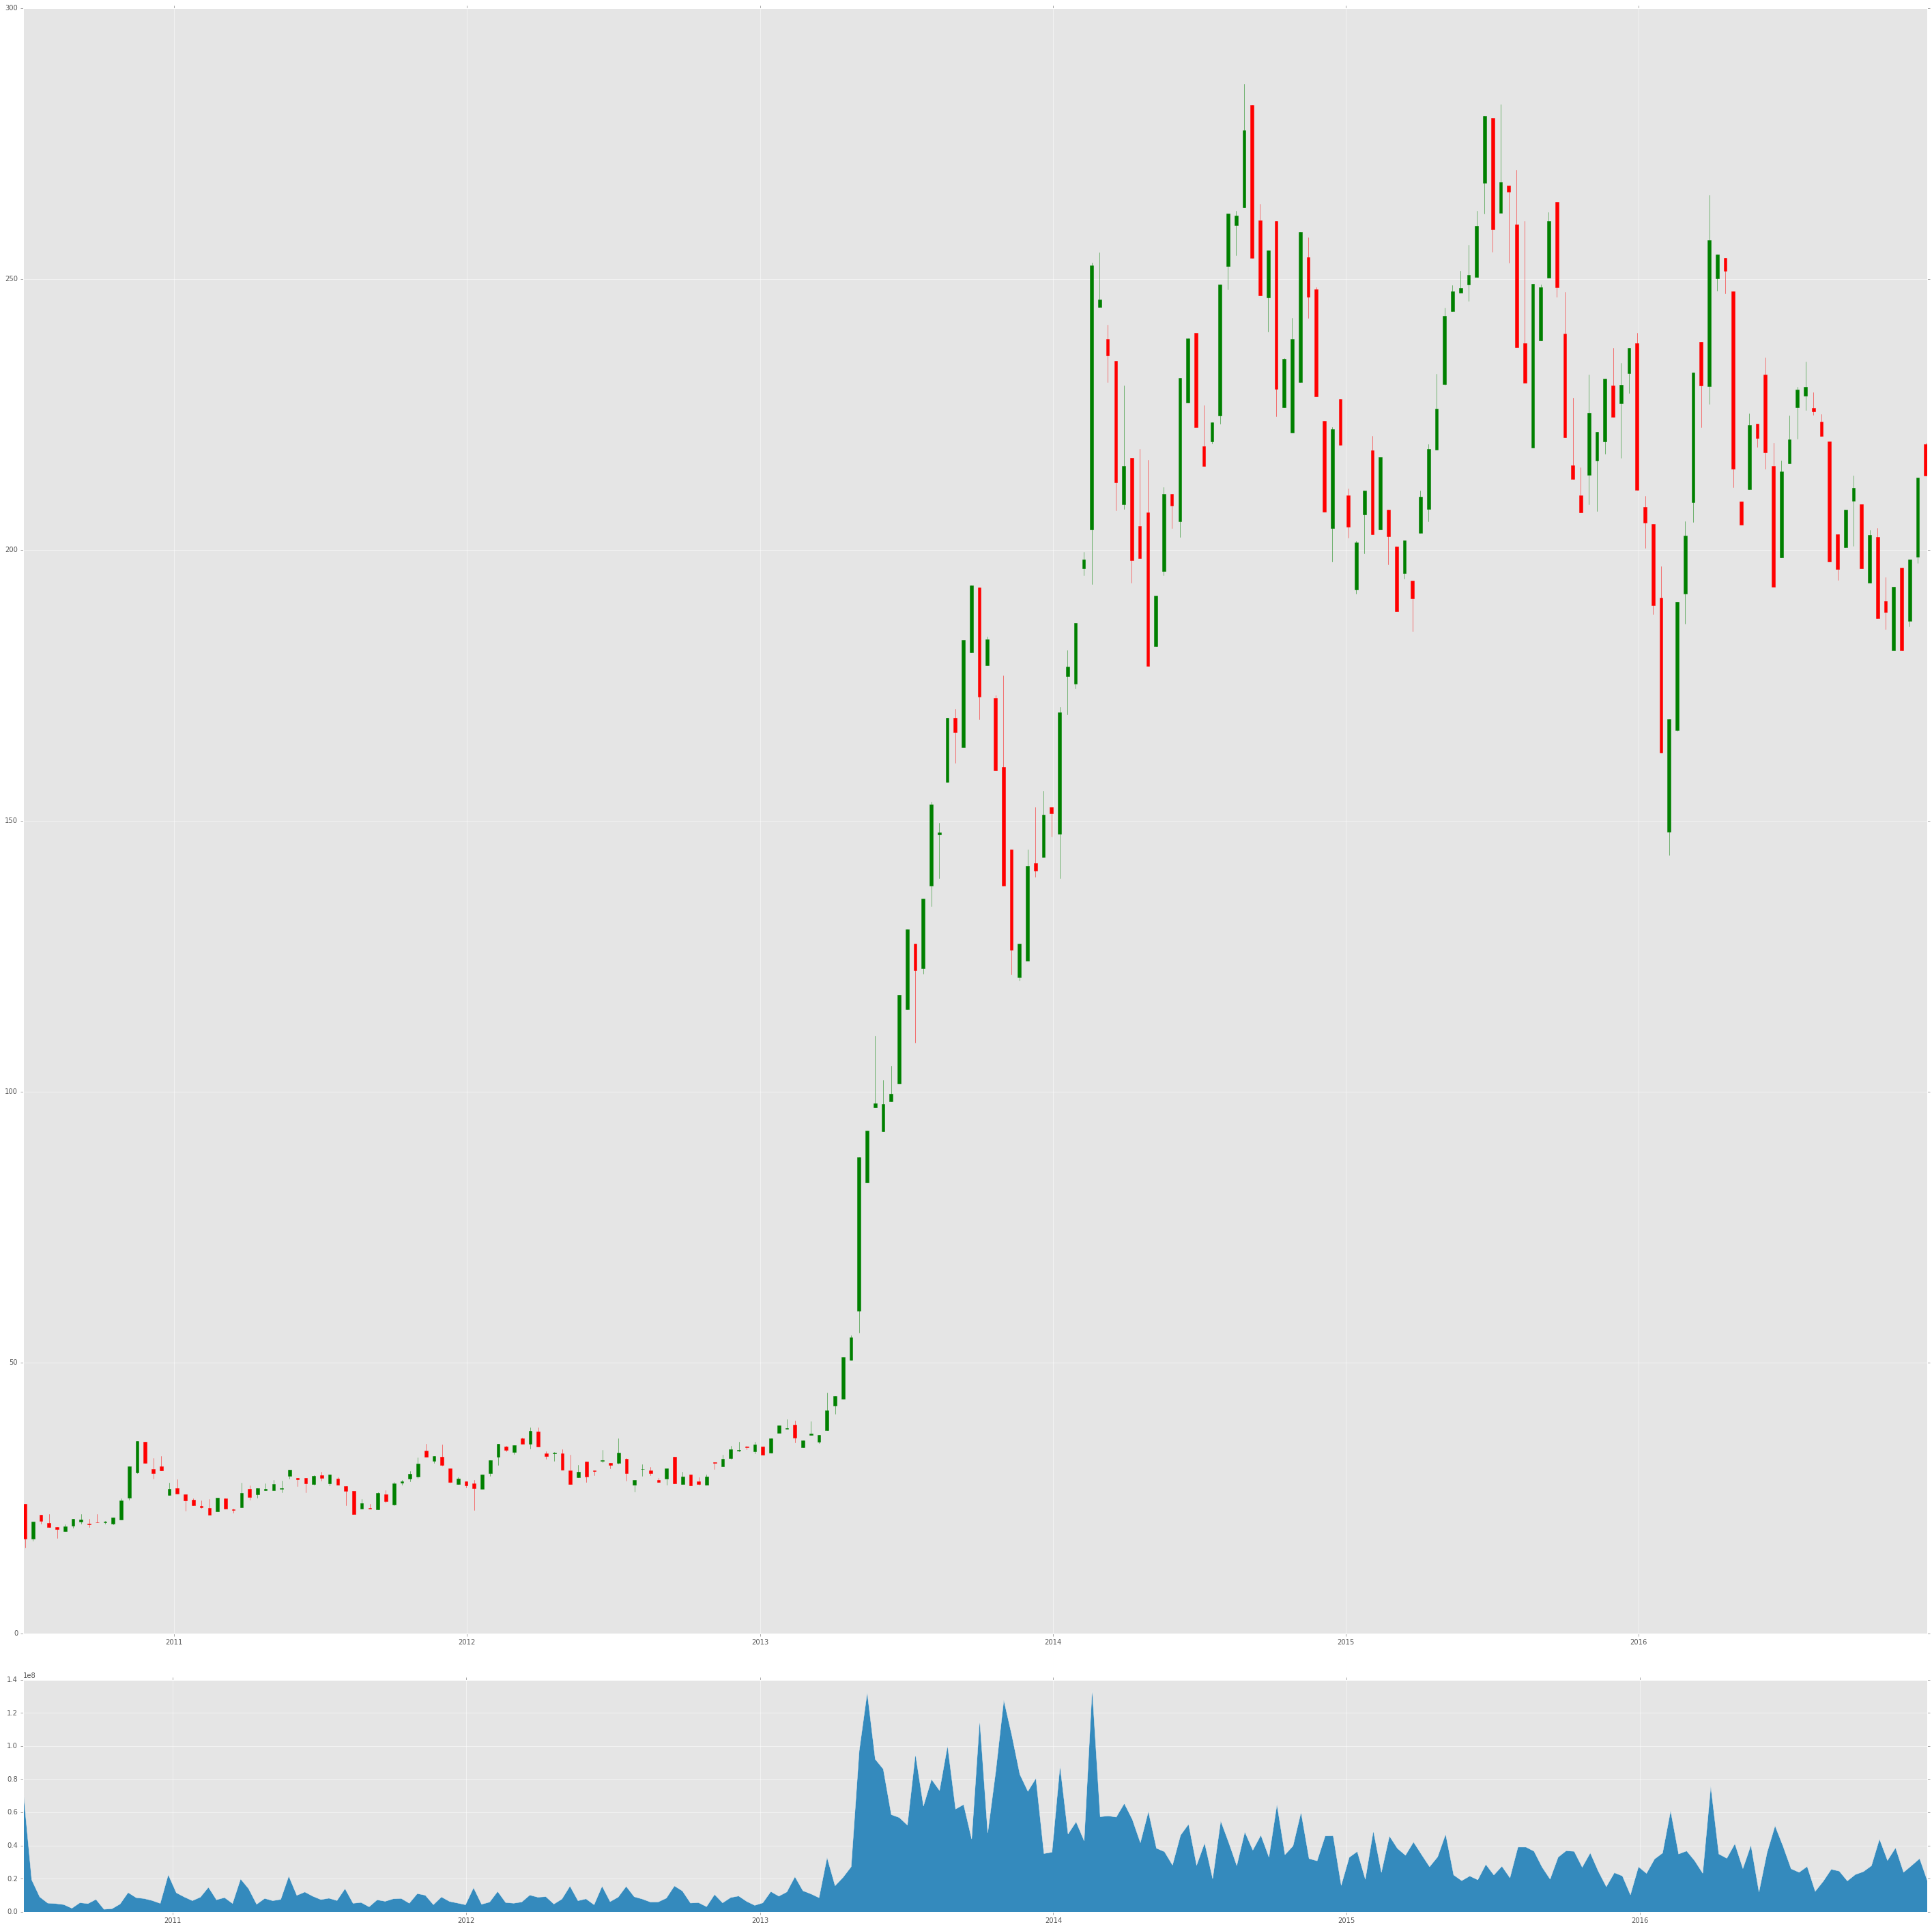

In [22]:
ax1=plt.subplot2grid((7,1),(0,0),rowspan=6, colspan=1)
ax2=plt.subplot2grid((7,1),(6,0),rowspan=1, colspan=1)

ax1.xaxis_date()
ax2.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=4, colorup='g', colordown='r')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [23]:
# Automating getting the s&p500 list

In [24]:
import bs4 as bs
import pickle
import requests
import lxml
from string import maketrans

In [25]:
def save_sp_500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,"lxml")
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.replace('.','-').strip()
        tickers.append(ticker)
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers, f)
        
    return tickers

#save_sp_500_tickers()

In [26]:
# Getting all company pricing data in the S&P 500

In [27]:
import os

In [28]:
def get_data_from_yahoo(reload_sp500=True):
    if reload_sp500: 
        tickers = save_sp_500_tickers() 
    else: 
        with open("sp500tickers.pickle", "rb") as f: 
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
            os.makedirs('stock_dfs')
               
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
            
    for ticker in tickers:
        try:
            print(ticker)
            if not os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            else: print('Already have {}'.format(ticker)) 
                
        except: 
            print('Cannot obtain data for ' +ticker) 

get_data_from_yahoo()

MMM
ABT
ABBV
ACN
ATVI
AYI
ADBE
AMD
AAP
AES
AET
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
ADI
ANDV
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
ADM
ARNC
AJG
AIZ
T
ADSK
ADP
AZO
AVB
AVY
BHGE
BLL
BAC
BK
BCR
BAX
BBT
BDX
BRK-B
BBY
BIIB
BLK
HRB
BA
BWA
BXP
BSX
BHF
BMY
AVGO
BF-B
CHRW
CA
COG
CDNS
CPB
COF
CAH
CBOE
KMX
CCL
CAT
CBG
CBS
CELG
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CHK
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
GLW
COST
COTY
CCI
CSRA
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DLPH
DAL
XRAY
DVN
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DWDP
DPS
DTE
DRE
DUK
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EVHC
EOG
EQT
EFX
EQIX
EQR
ESS
EL
ES
RE
EXC
EXPE
EXPD
ESRX
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FISV
FLIR
FLS
FLR
FMC
FL
F
FTV
FBHS
BEN
FCX
GPS
GRMN
IT
GD
GE
GGP
GIS
GM
GPC
GILD
GPN
GS
GT
GWW
HAL
HBI
HOG
HRS
HIG
HAS
HCA
HCP
HP
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HP

In [29]:
# combining data

In [30]:
def compile_data():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date',inplace =True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
            
        if count % 10 ==0:
            print(count)
    
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

compile_data()
            

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM        ABT  ABBV  ACN      ATVI  AYI       ADBE  \
Date                                                                    
1999-12-31  31.750277  10.433799   NaN  NaN  1.166288  NaN  16.693563   
2000-01-03  30.614885  10.056676   NaN  NaN  1.251975  NaN  16.274672   
2000-01-04  29.398392   9.769344   NaN  NaN  1.213892  NaN  14.909399   
2000-01-05  30.249941   9.751384   NaN  NaN  1.218653  NaN  15.204174   
2000-01-06  32.682892  10.092591   NaN  NaN  1.194851  NaN  15.328290   

                 AMD  AAP        AES ...   WYNN       XEL        XRX  \
Date                                 ...                               
1999-12-31  14.46875  NaN  32.281773 ...    NaN  8.688258  46.673988   
2000-01-03  15.50000  NaN  31.310091 ...    NaN  8.465485  49.759876   
2000-01

In [31]:
# Visualizing correlations

In [32]:
fig_size[0] = 100
fig_size[1] = 100
plt.rcParams["figure.figsize"] = fig_size

In [33]:
def visualize_data():
    df=pd.read_csv('sp500_joined_closes.csv')
    df_corr=df.corr()
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data,cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    

           MMM       ABT      ABBV       ACN      ATVI       AYI      ADBE  \
MMM   1.000000  0.947123  0.917590  0.966734  0.926825  0.962077  0.931914   
ABT   0.947123  1.000000  0.870608  0.953740  0.890652  0.903148  0.888535   
ABBV  0.917590  0.870608  1.000000  0.782810  0.740370  0.831226  0.868343   
ACN   0.966734  0.953740  0.782810  1.000000  0.939226  0.959037  0.924770   
ATVI  0.926825  0.890652  0.740370  0.939226  1.000000  0.966880  0.939486   

           AMD       AAP       AES    ...         WYNN       XEL       XRX  \
MMM  -0.517673  0.967155 -0.281598    ...     0.682478  0.942228  0.074603   
ABT  -0.584951  0.956129 -0.224202    ...     0.743091  0.944237  0.002217   
ABBV  0.188658  0.896813  0.056811    ...    -0.299059  0.786756  0.450472   
ACN  -0.511405  0.963566  0.040392    ...     0.683490  0.980613  0.065748   
ATVI -0.525573  0.908455 -0.256727    ...     0.528329  0.926868  0.008400   

          XLNX        XL       XYL       YUM       ZBH      ZI

/usr/lib/python2.7/dist-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


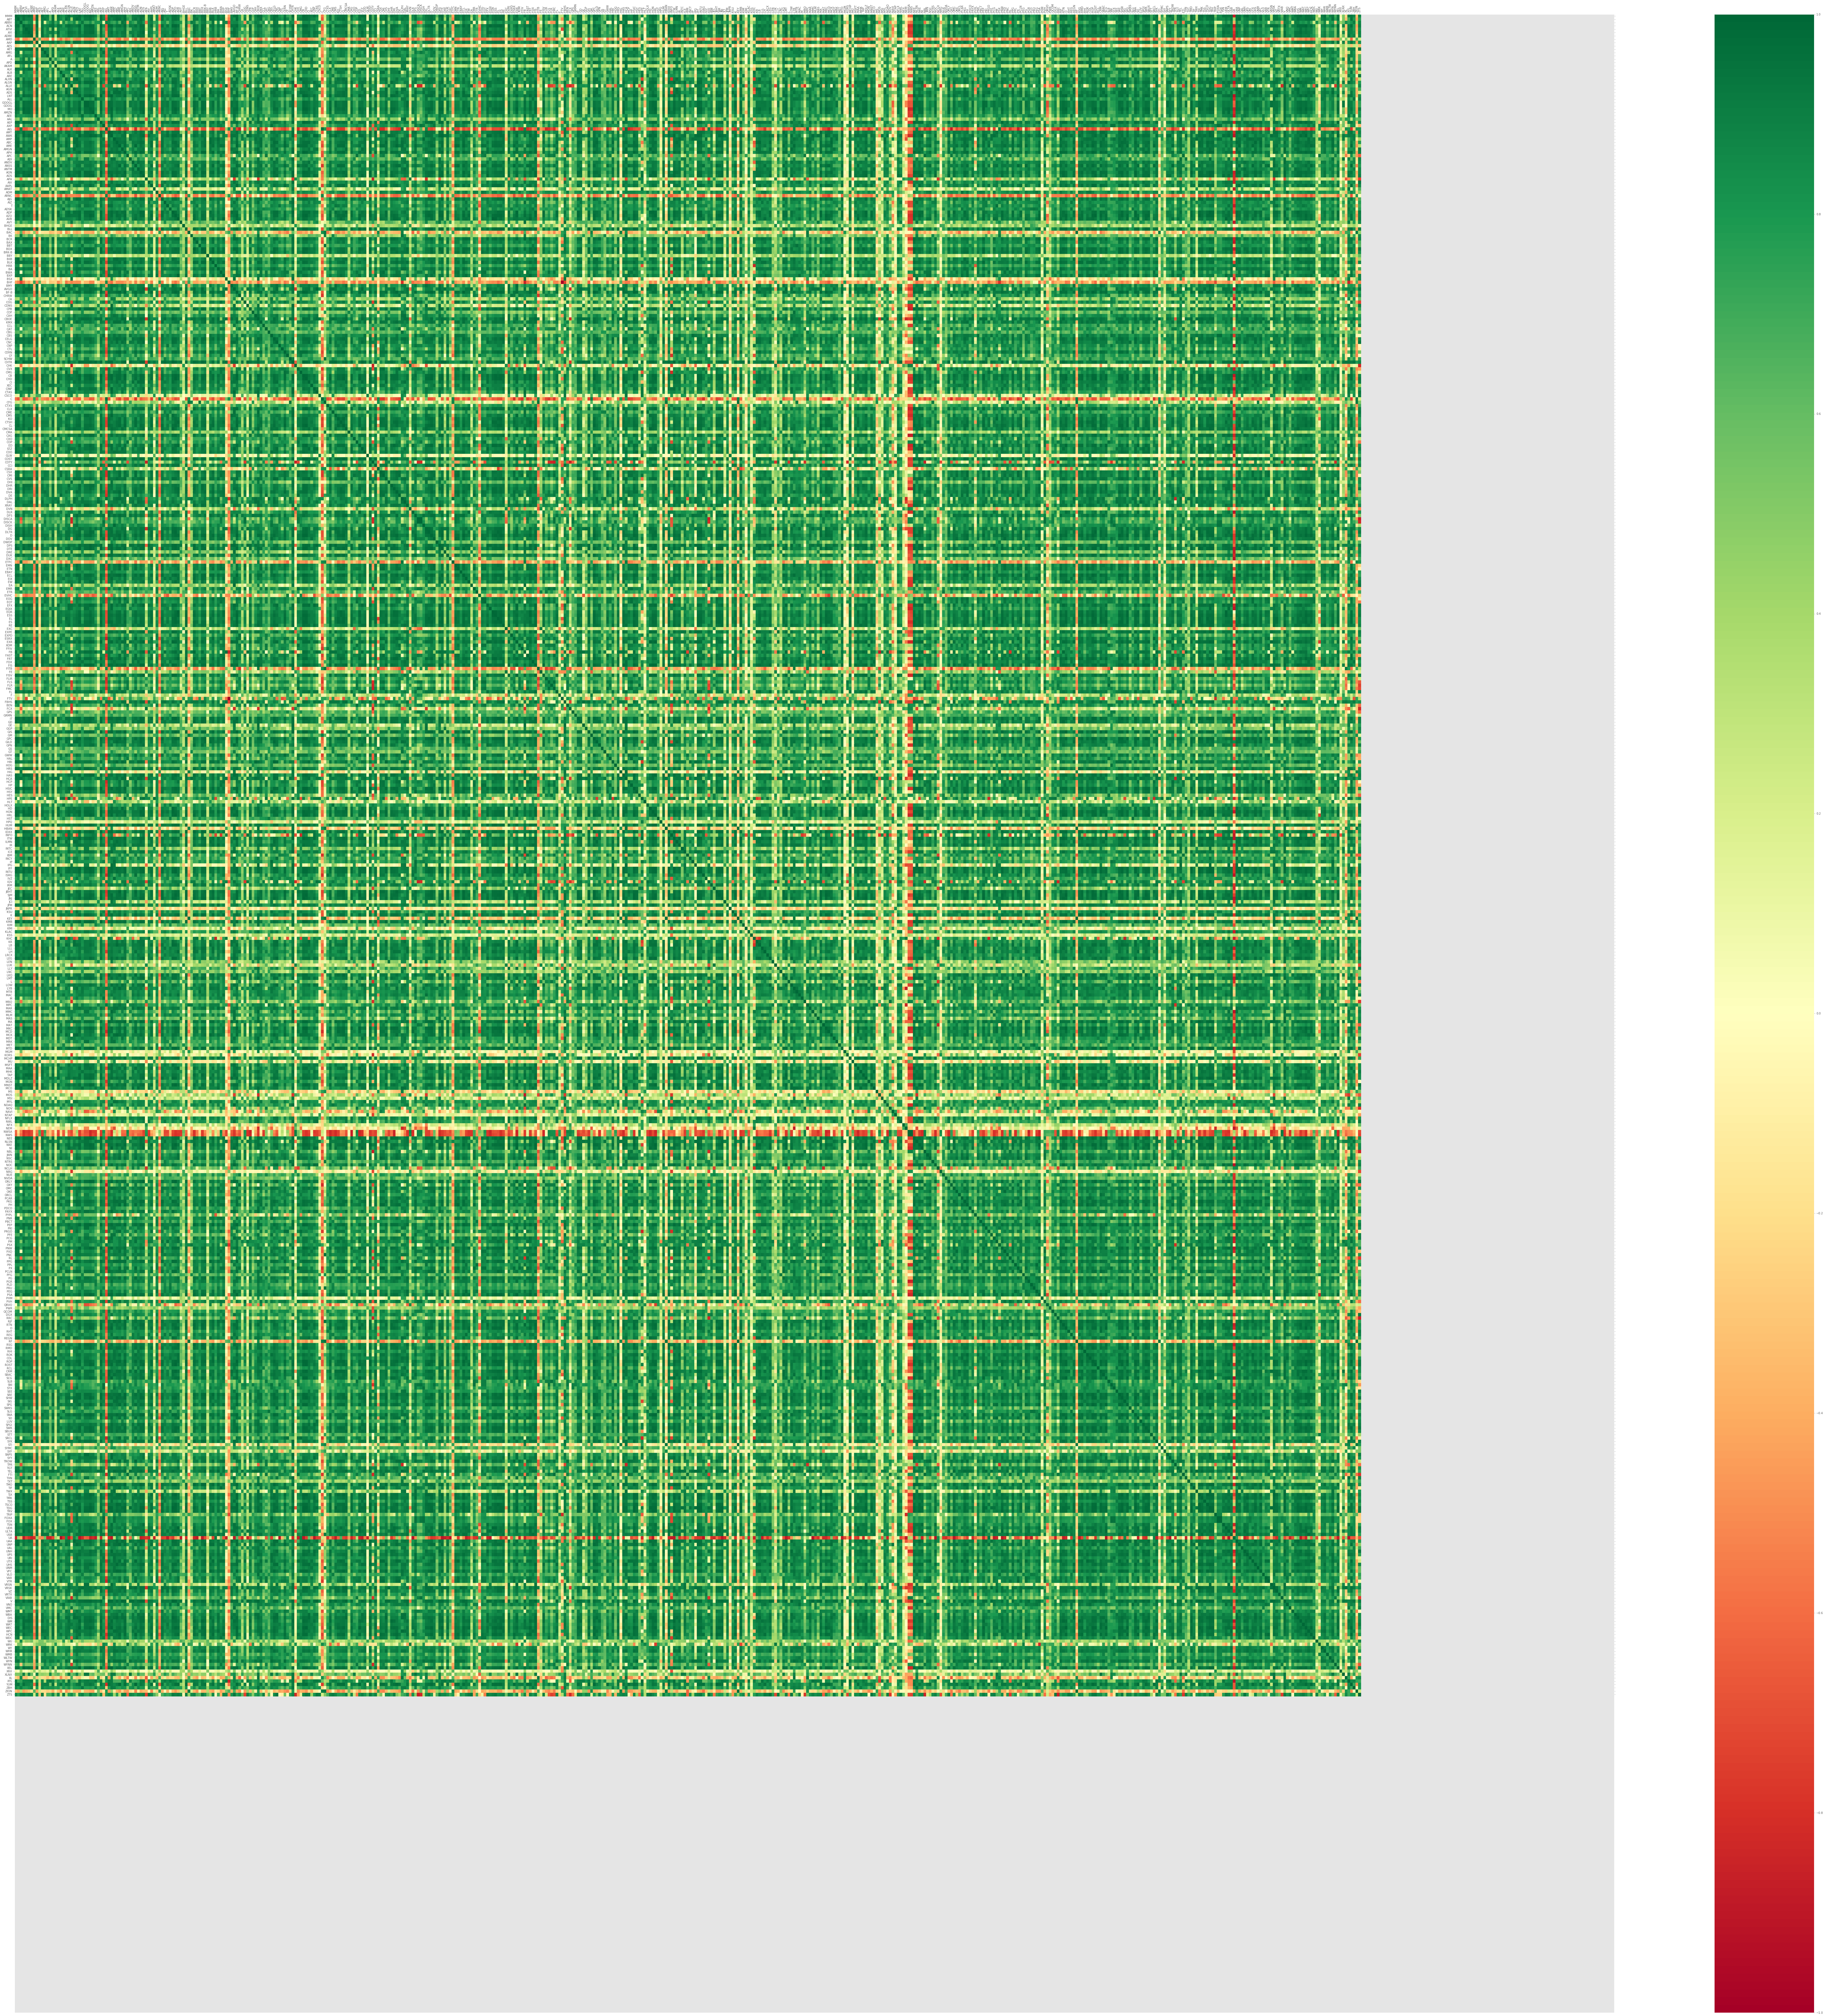

In [34]:
visualize_data()

In [35]:
# Preprocessing data for machine learning

In [36]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
        
    df.fillna(0, inplace=True)
    return tickers,df

In [37]:
# Creating machine learning target function

In [70]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.015
    for col in cols:
        if col > requirement:
            return 1       # label 1 = buy
        if col < -requirement:
            return -1      # label -1 = sell
    return 0               # label 0 = hold

In [71]:
# Creating labels for Machine Learning

In [72]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                             df['{}_1d'.format(ticker)],
                                             df['{}_1d'.format(ticker)],
                                             df['{}_1d'.format(ticker)],
                                             df['{}_1d'.format(ticker)],
                                             df['{}_1d'.format(ticker)],
                                             df['{}_1d'.format(ticker)],
                                             df['{}_1d'.format(ticker)]))
                                                
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
    df.fillna(0, inplace = True)
    df = df.replace([np.inf,-np.inf],np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker_name for ticker_name in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf,-np.inf],0)
    df_vals.fillna(0,inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df

In [73]:
extract_featuresets('GOOGL')

('Data spread:', Counter({'0': 3344, '1': 515, '-1': 419}))


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03576007, -0.03614436,  0.        , ...,  0.        ,
         -0.06230203,  0.        ],
        [-0.03973534, -0.02857127,  0.        , ...,  0.        ,
         -0.04842376,  0.        ],
        ..., 
        [-0.00469483, -0.00984456, -0.00367997, ...,  0.00155488,
         -0.01479628, -0.00521228],
        [ 0.00185322,  0.00235481,  0.00738719, ...,  0.00426941,
         -0.01132158,  0.00336826],
        [ 0.0008968 ,  0.00261027, -0.00175357, ..., -0.00289856,
          0.00584245, -0.00167849]]),
 array([0, 0, 0, ..., 0, 0, 0]),
                    MMM        ABT       ABBV         ACN       ATVI  \
 Date                                                                  
 1999-12-31   31.750277  10.433799   0.000000    0.000000   1.166288   
 2000-01-03   30.614885  10.056676   0.000000    0.000000   1.251975   
 2000-01-04   29.398392   9.769344   0.000000    0.

In [74]:
# Perform Machine learning

In [75]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.25)
    
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                           ('knn',neighbors.KNeighborsClassifier()),
                           ('rfor', RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy',confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

In [77]:
do_ml('BAC')

('Data spread:', Counter({'0': 2765, '1': 762, '-1': 751}))
('Accuracy', 0.64485981308411211)
('Predicted spread:', Counter({0: 1035, -1: 27, 1: 8}))


0.64485981308411211